# Problem Transformation

This notebook discusses Multi-label algorithm probelm transformation methods for the [academia.stackexchange.com](https://academia.stackexchange.com/) data dump.

## Table of Contents
* [Data import](#data_import)
* [Methods](#methods)

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from joblib import dump, load
from academia_tag_recommender.classifier import Classifier

RANDOM_STATE = 0

<a id='data_import'/>

## Data import

In [2]:
from academia_tag_recommender.test_train_data import get_X_reduced, get_y, get_test_train_data
from academia_tag_recommender.preprocessing_definition import PreprocessingDefinition

preprocessing = PreprocessingDefinition('tfidf', 'basic', 'basic', 'english', '1,1', 'TruncatedSVD')

X = get_X_reduced(preprocessing)
y = get_y()
X_train, X_test, y_train, y_test = get_test_train_data(X, y)

print(y_test.shape)

(8270, 190)


<a id='methods'/>

## Methods

Algorithms in scikit-learn suited for Multi-label problem transformation:
- [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
- [ExtraTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.ExtraTreeClassifier.html#sklearn.tree.ExtraTreeClassifier)
- [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)
- [RadiusNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.RadiusNeighborsClassifier.html#sklearn.neighbors.RadiusNeighborsClassifier)
- [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)
- [RidgeClassifierCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifierCV.html#sklearn.linear_model.RidgeClassifierCV)

Multi-label suport can be added to all Classifiers using.
- [MultioutputClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html#sklearn.multioutput.MultiOutputClassifier)

sklearn-multilabel:
- [Label Powerset](http://scikit.ml/api/skmultilearn.problem_transform.lp.html#skmultilearn.problem_transform.LabelPowerset)

In [3]:
clf_paths = []
def create_classifier(classifier):
    clf = Classifier(classifier, preprocessing)
    clf.fit(X_train, y_train)
    clf.score(X_test, y_test)
    path = clf.save()
    print(clf.training_time)
    clf.evaluation.print_stats()
    clf_paths.append(path)

**DecisionTreeClassifier**

In [4]:
from sklearn.tree import DecisionTreeClassifier

create_classifier(DecisionTreeClassifier(random_state=RANDOM_STATE))

5327.355006933212
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.021360656781009357     0.011003627569528416     0.22224909310761787      0.21720274083031035      0.20033166349974088      
micro                                                            0.20618508686134787      0.2113429130663102       0.20873214201518223      
macro                                                            0.09627844734810827      0.09745655174139854      0.09642584899487631      


**ExtraTreeClassifier**

In [5]:
from sklearn.tree import ExtraTreeClassifier

create_classifier(ExtraTreeClassifier(random_state=RANDOM_STATE))

10.196390628814697
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.02435499268121937      0.0037484885126964932    0.09246473196291817      0.08758565094719871      0.08217078367017906      
micro                                                            0.08812060110329085      0.08846135484794959      0.08829064919594998      
macro                                                            0.03638901951487082      0.03670672955477914      0.036319904591231945     


**KNeighborsClassifier**

In [6]:
from sklearn.neighbors import KNeighborsClassifier

create_classifier(KNeighborsClassifier())

52.80897617340088
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.0132718131483485       0.04087061668681983      0.03873438129786376      0.020378879484079        0.02520700178499453      
micro                                                            0.5672937771345875       0.018713896978087553     0.03623255384046584      
macro                                                            0.27263594289948495      0.022285028770720628     0.03590255628336881      


**RadiusNeighborsClassifier**

In [7]:
from sklearn.neighbors import RadiusNeighborsClassifier

create_classifier(RadiusNeighborsClassifier(outlier_label='most_frequent'))

52.912684202194214
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.013331636224782027     0.03784764207980653      0.0                      0.0                      0.0                      
micro                                                            0.0                      0.0                      0.0                      
macro                                                            0.0                      0.0                      0.0                      


**MLPClassifier**

In [8]:
from sklearn.neural_network import MLPClassifier

create_classifier(MLPClassifier(random_state=RANDOM_STATE))

662.7855405807495
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.014293260357665627     0.052478839177750904     0.3897544193009731       0.30515114873035065      0.3144485099745075       
micro                                                            0.44641338247802664      0.3006635795101924       0.3593210668948795       
macro                                                            0.45939699857443805      0.20284927363309643      0.2675384724087306       


**RidgeClassifierCV**

*TODO: implementation needs to be adjusted for different prediction format: `[125 278 302 ...  80  64 158]`*

In [9]:
from sklearn.linear_model import RidgeClassifierCV

#create_classifier(RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1]))

**MultioutputClassifier**

In [10]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import LinearSVC

create_classifier(MultiOutputClassifier(LinearSVC(random_state=RANDOM_STATE)))

C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


1824.6851198673248
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.016418888818176033     0.034582829504232165     0.3699768238613462       0.3488532849657396       0.3281095332183603       
micro                                                            0.3737116085372202       0.34272210817778204      0.3575466294792938       
macro                                                            0.46469453204551525      0.2540879344586293       0.3098419162119082       


In [11]:
from sklearn.linear_model import LogisticRegression

create_classifier(MultiOutputClassifier(LogisticRegression(random_state=RANDOM_STATE)))

800.4620418548584
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.01308025202061987      0.06432889963724304      0.4300040306328094       0.3040790004030633       0.3286676839216138       
micro                                                            0.516375727348296        0.2965579796629589       0.3767474300269885       
macro                                                            0.5672426946204912       0.18683334760342143      0.261418657670839        


**Classwise Classifier**

In [12]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score

scorer = make_scorer(accuracy_score)

In [15]:
from academia_tag_recommender.classwise_classifier import ClasswiseClassifier, ClassifierOption

classifier_options = [ClassifierOption(LinearSVC(random_state=RANDOM_STATE), grid_search=True, parameter={'C':[0.1, 0.5, 1, 5, 10]}),
                      ClassifierOption(LogisticRegressionCV(Cs=[0.1, 0.5, 1, 5, 10], random_state=RANDOM_STATE, max_iter=2000, scoring=scorer))]
                      #ClassifierOption(RandomForestClassifier(random_state=RANDOM_STATE))]

create_classifier(ClasswiseClassifier(classifier_options))

C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of 

30816.391127824783
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.011758416597721632     0.08174123337363966      0.4301430874647319       0.2529604997984684       0.2983652904934646       
micro                                                            0.6613134874004439       0.24180073518880985      0.3541215129693071       
macro                                                            0.5291015651493476       0.17916211568128335      0.24844693575647753      


In [16]:
evals = []
for clf_path in clf_paths:
    clf = load(clf_path)
    evaluation = clf.evaluation
    evals.append([str(clf), evaluation])

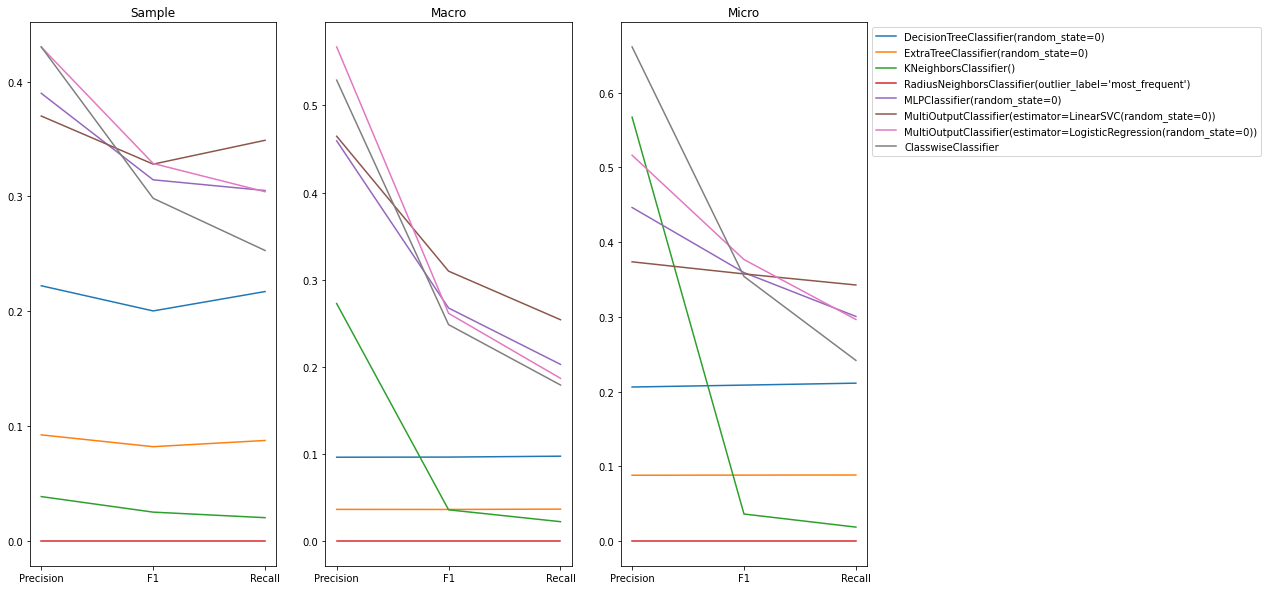

In [17]:
x_ = ['Precision', 'F1', 'Recall']
fig, axes = plt.subplots(1, 3, figsize=(15,10))
axes[0].set_title('Sample')
axes[1].set_title('Macro')
axes[2].set_title('Micro')
for eval_ in evals:
    evaluator = eval_[1]
    axes[0].plot(x_, [evaluator.precision_samples, evaluator.f1_samples, evaluator.recall_samples], label=eval_[0])
    axes[1].plot(x_, [evaluator.precision_macro, evaluator.f1_macro, evaluator.recall_macro], label=eval_[0])
    axes[2].plot(x_, [evaluator.precision_micro, evaluator.f1_micro, evaluator.recall_micro], label=eval_[0])
axes[2].legend(bbox_to_anchor=(1, 1), ncol=1)
plt.show()

In [18]:
top_3 = sorted(clf_paths, key=lambda x: load(x).evaluation.sum(), reverse=True)[:3]

In [19]:
from sklearn.metrics import classification_report
classwise_results = []
for clf_path in top_3:
    clf = load(clf_path)
    prediction = clf.predict(X_test)
    classwise_results.append((clf, classification_report(y_test, prediction, output_dict=True, zero_division=0)))

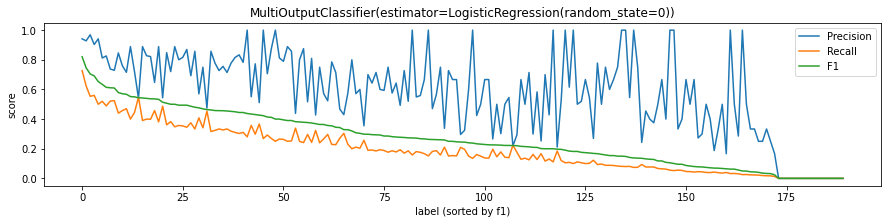

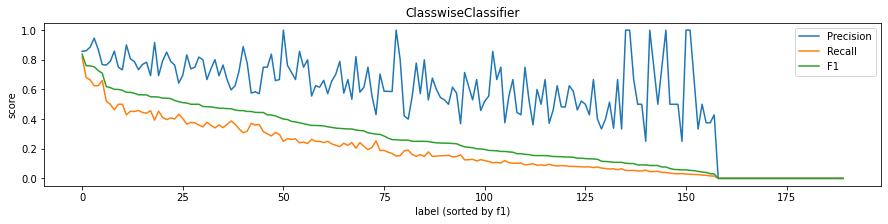

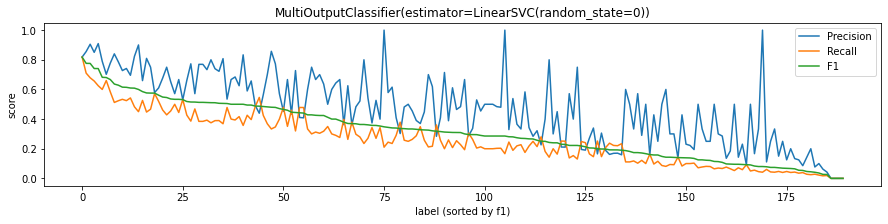

In [20]:
#print(classwise_results)
import numpy as np
x_ = np.arange(0, len(y_test[0]))
for classwise_result in classwise_results:
    name, results = classwise_result
    _, fig_1 = plt.subplots(figsize=(15,3))
    fig_1.set_title(name)
    sorted_results = sorted(results, key=lambda x: results[x]['f1-score'], reverse=True)
    fig_1.plot(x_, [results[result]['precision'] for result in sorted_results][0:len(x_)], label='Precision')
    fig_1.plot(x_, [results[result]['recall'] for result in sorted_results][0:len(x_)], label='Recall')
    fig_1.plot(x_, [results[result]['f1-score'] for result in sorted_results][0:len(x_)], label='F1')
    fig_1.set_xlabel('label (sorted by f1)')
    fig_1.set_ylabel('score')
    fig_1.legend(loc='best')
plt.show()